In [1]:
import sys, os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from subprocess import check_output
import os


sys.path.append('tools')
from configmanager import ConfigurationManager

'''configurationManager = ConfigurationManager()

video_path_file= configurationManager.config_readable['video_path_file']
flight_id, ext = os.path.splitext(os.path.basename(video_path_file))'''

ana_dataset = "../../Datasets/Mantis-Shrimp-Eye-s-Collision-Avoidance/"
dnn_dataset = "../../Datasets/Mantis-Shrimp-Eye-s-Collision-Avoidance/dnn_dataset/"
output_path_folder = "../../Datasets/Mantis-Shrimp-Eye-s-Collision-Avoidance/outputs/"


# Ana Result

In [3]:
path_dnn_ana_result_dataframe = output_path_folder+'/dnn_ana_result_dataframe.csv'
dnn_ana_result_dataframe =pd.read_csv(path_dnn_ana_result_dataframe)
dnn_ana_result_dataframe.head()

FileNotFoundError: [Errno 2] No such file or directory: '../../Datasets/Mantis-Shrimp-Eye-s-Collision-Avoidance/outputs//dnn_ana_result_dataframe.csv'

In [4]:
dnn_ana_result_dataframe.tail()

,olusturulma_zamani,flight_id,toplam_frame,kac_karsilasma,ucus_var_tahmin_yok,ucus_yok_tahmin_var,max_range,fps,camera_size,model
0,2023-03-11 14:26:13.773659,00bb96a5a68f4fa5bc5c5dc66ce314d2,201,93,54,0,353.3189,10,"('camera_type:', 'amazon_prime_air_half', ' wi...",best_250_1024.pt


# Train - Test Back - Test Uçuş

In [17]:
ana_train_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_train_islemis_dataframe.csv')
ana_test_background_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_test_background_islemis_dataframe.csv')
ana_test_islemis_dataframe =pd.read_csv(ana_dataset+'/ana_test_islemis_dataframe.csv')

ana_train_islemis_dataframe.head()

,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects
0,0001ba865c8e410e88609541b8f55ffc,1199,8,1102,{'Helicopter1'}
1,0011f3f114a741b5b02326c9e96e597a,1199,8,1117,{'Airplane1'}
2,0036dcc16c474b1abaf14d1735a7e1cf,1199,6,1124,{'Helicopter1'}
3,006345553ed64e77a52d94035e1e747a,1199,10,1096,{'Helicopter1'}
4,0071600242424070b5e0c8cb237192db,1197,4,1139,{'Airplane1'}


In [18]:

ana_test_background_islemis_dataframe.head()

,flight_id,toplam_frame
0,001578c6c6b340738c9277fcb1307e34,1199
1,0022217d1ed446e9a3a5fef13d33facf,1199
2,003e7a4bf58b4849a90556cb26de248c,1199
3,004474050bdc46c2805ae42048c24c2f,1199
4,004c26c2de5a4d2a85248be48844cb48,1199


In [19]:

ana_test_islemis_dataframe.head()

,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects


# Flight ID

In [43]:
flight_id = "00bb96a5a68f4fa5bc5c5dc66ce314d2"

flight_id_var_mi=ana_train_islemis_dataframe[ana_train_islemis_dataframe["flight_id"]==flight_id].empty

if flight_id_var_mi ==False:
    temp = ana_train_islemis_dataframe[ana_train_islemis_dataframe["flight_id"]==flight_id]
    print("trainde")
    

flight_id_var_mi=ana_test_background_islemis_dataframe[ana_test_background_islemis_dataframe["flight_id"]==flight_id].empty
if flight_id_var_mi==False:
    temp = ana_test_background_islemis_dataframe[ana_test_background_islemis_dataframe["flight_id"]==flight_id]
    print("test_background_islemis_dataframe")

flight_id_var_mi=ana_test_islemis_dataframe[ana_test_islemis_dataframe["flight_id"]==flight_id].empty
if flight_id_var_mi==False:
    temp = ana_test_islemis_dataframe[ana_test_islemis_dataframe["flight_id"]==flight_id]
    print("test_islemis_dataframe")


temp

trainde


,flight_id,toplam_frame,aldigimiz_background_sayisi,toplam_background_sayisi,all_objects
10,00bb96a5a68f4fa5bc5c5dc66ce314d2,1199,8,1106,{'Airplane1'}


## Result flight

In [99]:
path_dnn_result_dataframe = os.path.join(output_path_folder+flight_id+"/")+'/dnn_result_dataframe.csv'

dnn_result_dataframe = pd.read_csv(path_dnn_result_dataframe)


dnn_result_dataframe['diff_width'] = dnn_result_dataframe['dnn_width'] - dnn_result_dataframe['pred_width']
dnn_result_dataframe['diff_height'] = dnn_result_dataframe['dnn_height'] - dnn_result_dataframe['pred_height']

dnn_result_dataframe['dnn_area'] = dnn_result_dataframe['dnn_width'] * dnn_result_dataframe['dnn_height']
dnn_result_dataframe['pred_area'] = dnn_result_dataframe['pred_width'] * dnn_result_dataframe['pred_height']
dnn_result_dataframe['diff_area'] = dnn_result_dataframe['dnn_area'] - dnn_result_dataframe['pred_area']


dnn_result_dataframe.head()

,frame_id,result_type,dnn_object_type,dnn_width,dnn_height,dnn_range_distance,pred_object_type,pred_width,pred_height,pred_range_distance,pred_confidence,diff_width,diff_height,dnn_area,pred_area,diff_area
0,105,FalseNagative,Airplane,27.0,7.2,699.080159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,194.40,NaN,NaN
1,106,FalseNagative,Airplane,28.6,6.6,692.630062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,188.76,NaN,NaN
2,107,FalseNagative,Airplane,29.2,7.6,686.419015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,221.92,NaN,NaN
3,108,FalseNagative,Airplane,28.8,7.0,679.760444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201.60,NaN,NaN
4,109,FalseNagative,Airplane,29.4,6.8,673.387413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.92,NaN,NaN


In [100]:
dnn_result_dataframe.tail()

,frame_id,result_type,dnn_object_type,dnn_width,dnn_height,dnn_range_distance,pred_object_type,pred_width,pred_height,pred_range_distance,pred_confidence,diff_width,diff_height,dnn_area,pred_area,diff_area
88,193,TruePositive,Airplane,170.6,56.2,150.086884,Airplane,170.0,54.0,0.0,0.901899,0.6,2.2,9587.72,9180.0,407.72
89,194,TruePositive,Airplane,182.2,60.4,145.123922,Airplane,178.0,58.0,0.0,0.905265,4.2,2.4,11004.88,10324.0,680.88
90,195,TruePositive,Airplane,192.2,64.6,140.130316,Airplane,194.0,62.0,0.0,0.917528,-1.8,2.6,12416.12,12028.0,388.12
91,196,TruePositive,Airplane,152.6,71.4,135.441598,Airplane,154.0,72.0,0.0,0.869807,-1.4,-0.6,10895.64,11088.0,-192.36
92,197,TruePositive,Airplane,82.6,50.8,130.914401,Airplane,84.0,50.0,0.0,0.802648,-1.4,0.8,4196.08,4200.0,-3.92


In [47]:
dnn_result_dataframe.describe()

,frame_id,dnn_width,dnn_height,dnn_range_distance,pred_width,pred_height,pred_range_distance,pred_confidence
count,93.000000,93.000000,93.000000,93.000000,39.000000,39.000000,39.0,39.000000
mean,151.000000,65.634371,19.779036,406.793880,102.153846,32.769231,0.0,0.854057
std,26.990739,39.447942,14.419344,169.403831,36.924916,14.228329,0.0,0.054445
min,105.000000,27.000000,6.600000,130.914401,58.000000,18.000000,0.0,0.717685
25%,128.000000,36.600000,10.200000,259.552576,74.000000,21.000000,0.0,0.841581
50%,151.000000,49.800000,13.200000,404.134268,90.000000,28.000000,0.0,0.869807
75%,174.000000,82.600000,24.000000,551.537168,126.000000,41.000000,0.0,0.887214
max,197.000000,192.200000,71.400000,699.080159,194.000000,72.000000,0.0,0.917528


In [48]:
dnn_result_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frame_id             93 non-null     int64  
 1   result_type          93 non-null     object 
 2   dnn_object_type      93 non-null     object 
 3   dnn_width            93 non-null     float64
 4   dnn_height           93 non-null     float64
 5   dnn_range_distance   93 non-null     float64
 6   pred_object_type     39 non-null     object 
 7   pred_width           39 non-null     float64
 8   pred_height          39 non-null     float64
 9   pred_range_distance  39 non-null     float64
 10  pred_confidence      39 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.1+ KB


In [74]:
dnn_result_dataframe['result_type'].value_counts(dropna =False)



FalseNagative    54
TruePositive     39
Name: result_type, dtype: int64

In [51]:
dnn_result_dataframe['dnn_object_type'].value_counts(dropna =False)

Airplane    93
Name: dnn_object_type, dtype: int64

<Axes: title={'center': 'frame_id'}, xlabel='result_type'>

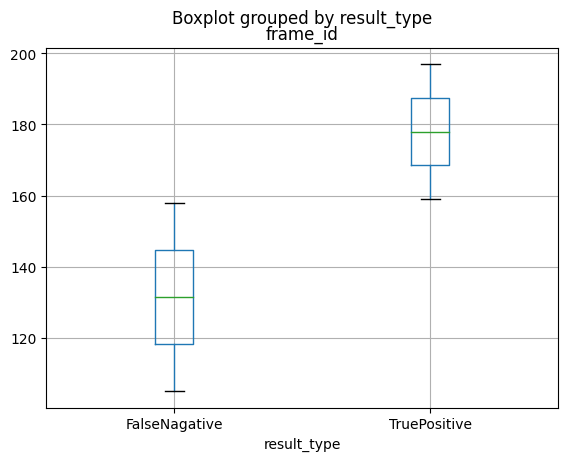

In [52]:
dnn_result_dataframe.boxplot(column='frame_id',by = 'result_type')

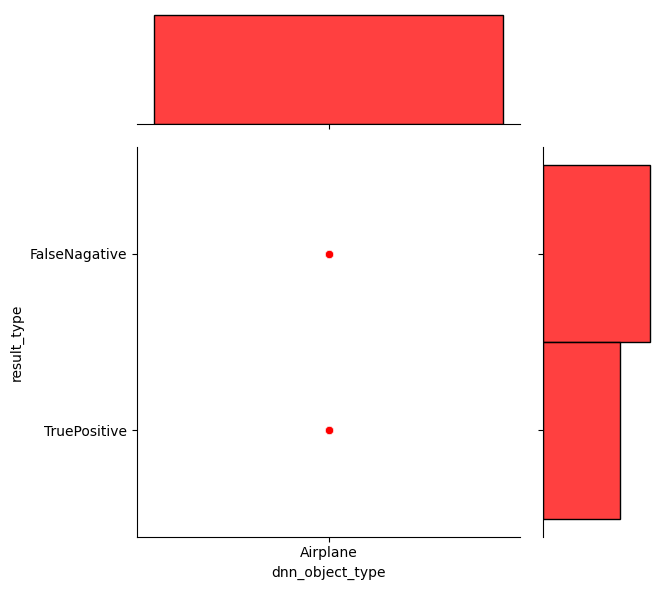

In [64]:
g = sns.jointplot(x=dnn_result_dataframe['dnn_object_type'], y=dnn_result_dataframe['result_type'], ratio=3, color="r")

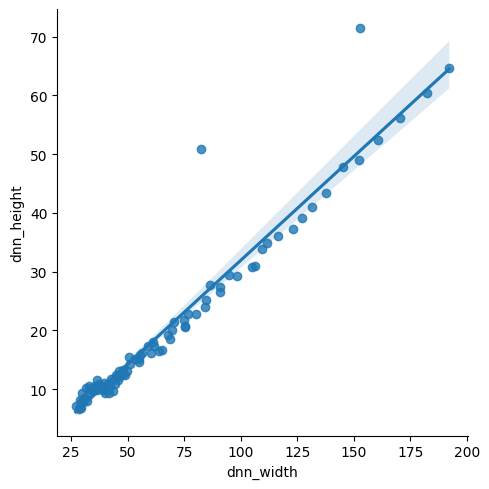

In [65]:
sns.lmplot(x="dnn_width", y="dnn_height", data=dnn_result_dataframe)
plt.show()

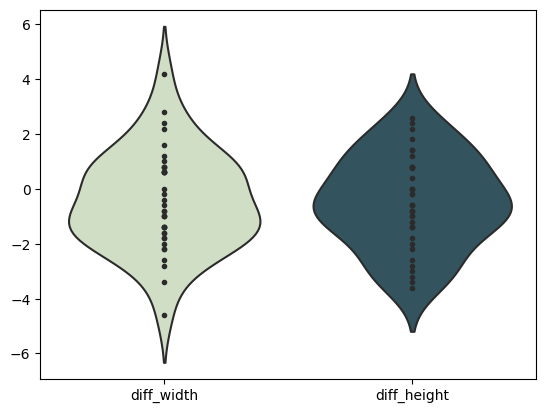

In [94]:
data1 = pd.DataFrame()
data1['diff_width'] = dnn_result_dataframe['dnn_width'] - dnn_result_dataframe['pred_width']
data1['diff_height'] = dnn_result_dataframe['dnn_height'] - dnn_result_dataframe['pred_height']

pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data1, palette=pal, inner="points")
plt.show()

C:\Users\Aircar\AppData\Local\Temp\ipykernel_7964\2339887062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dnn_result_dataframe.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)


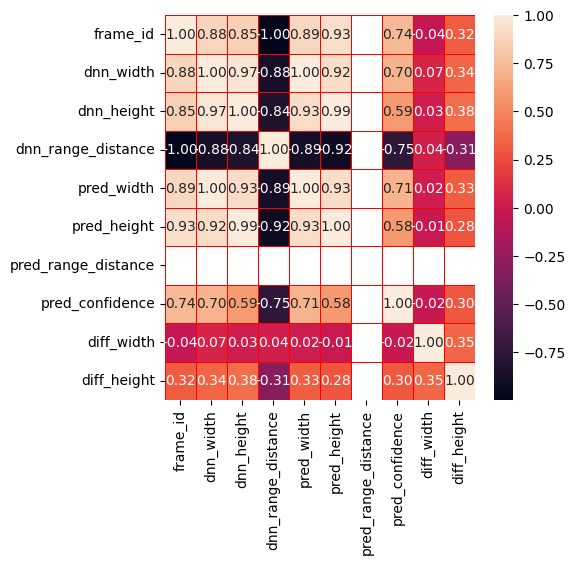

In [95]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(dnn_result_dataframe.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.2f',ax=ax)
plt.show()

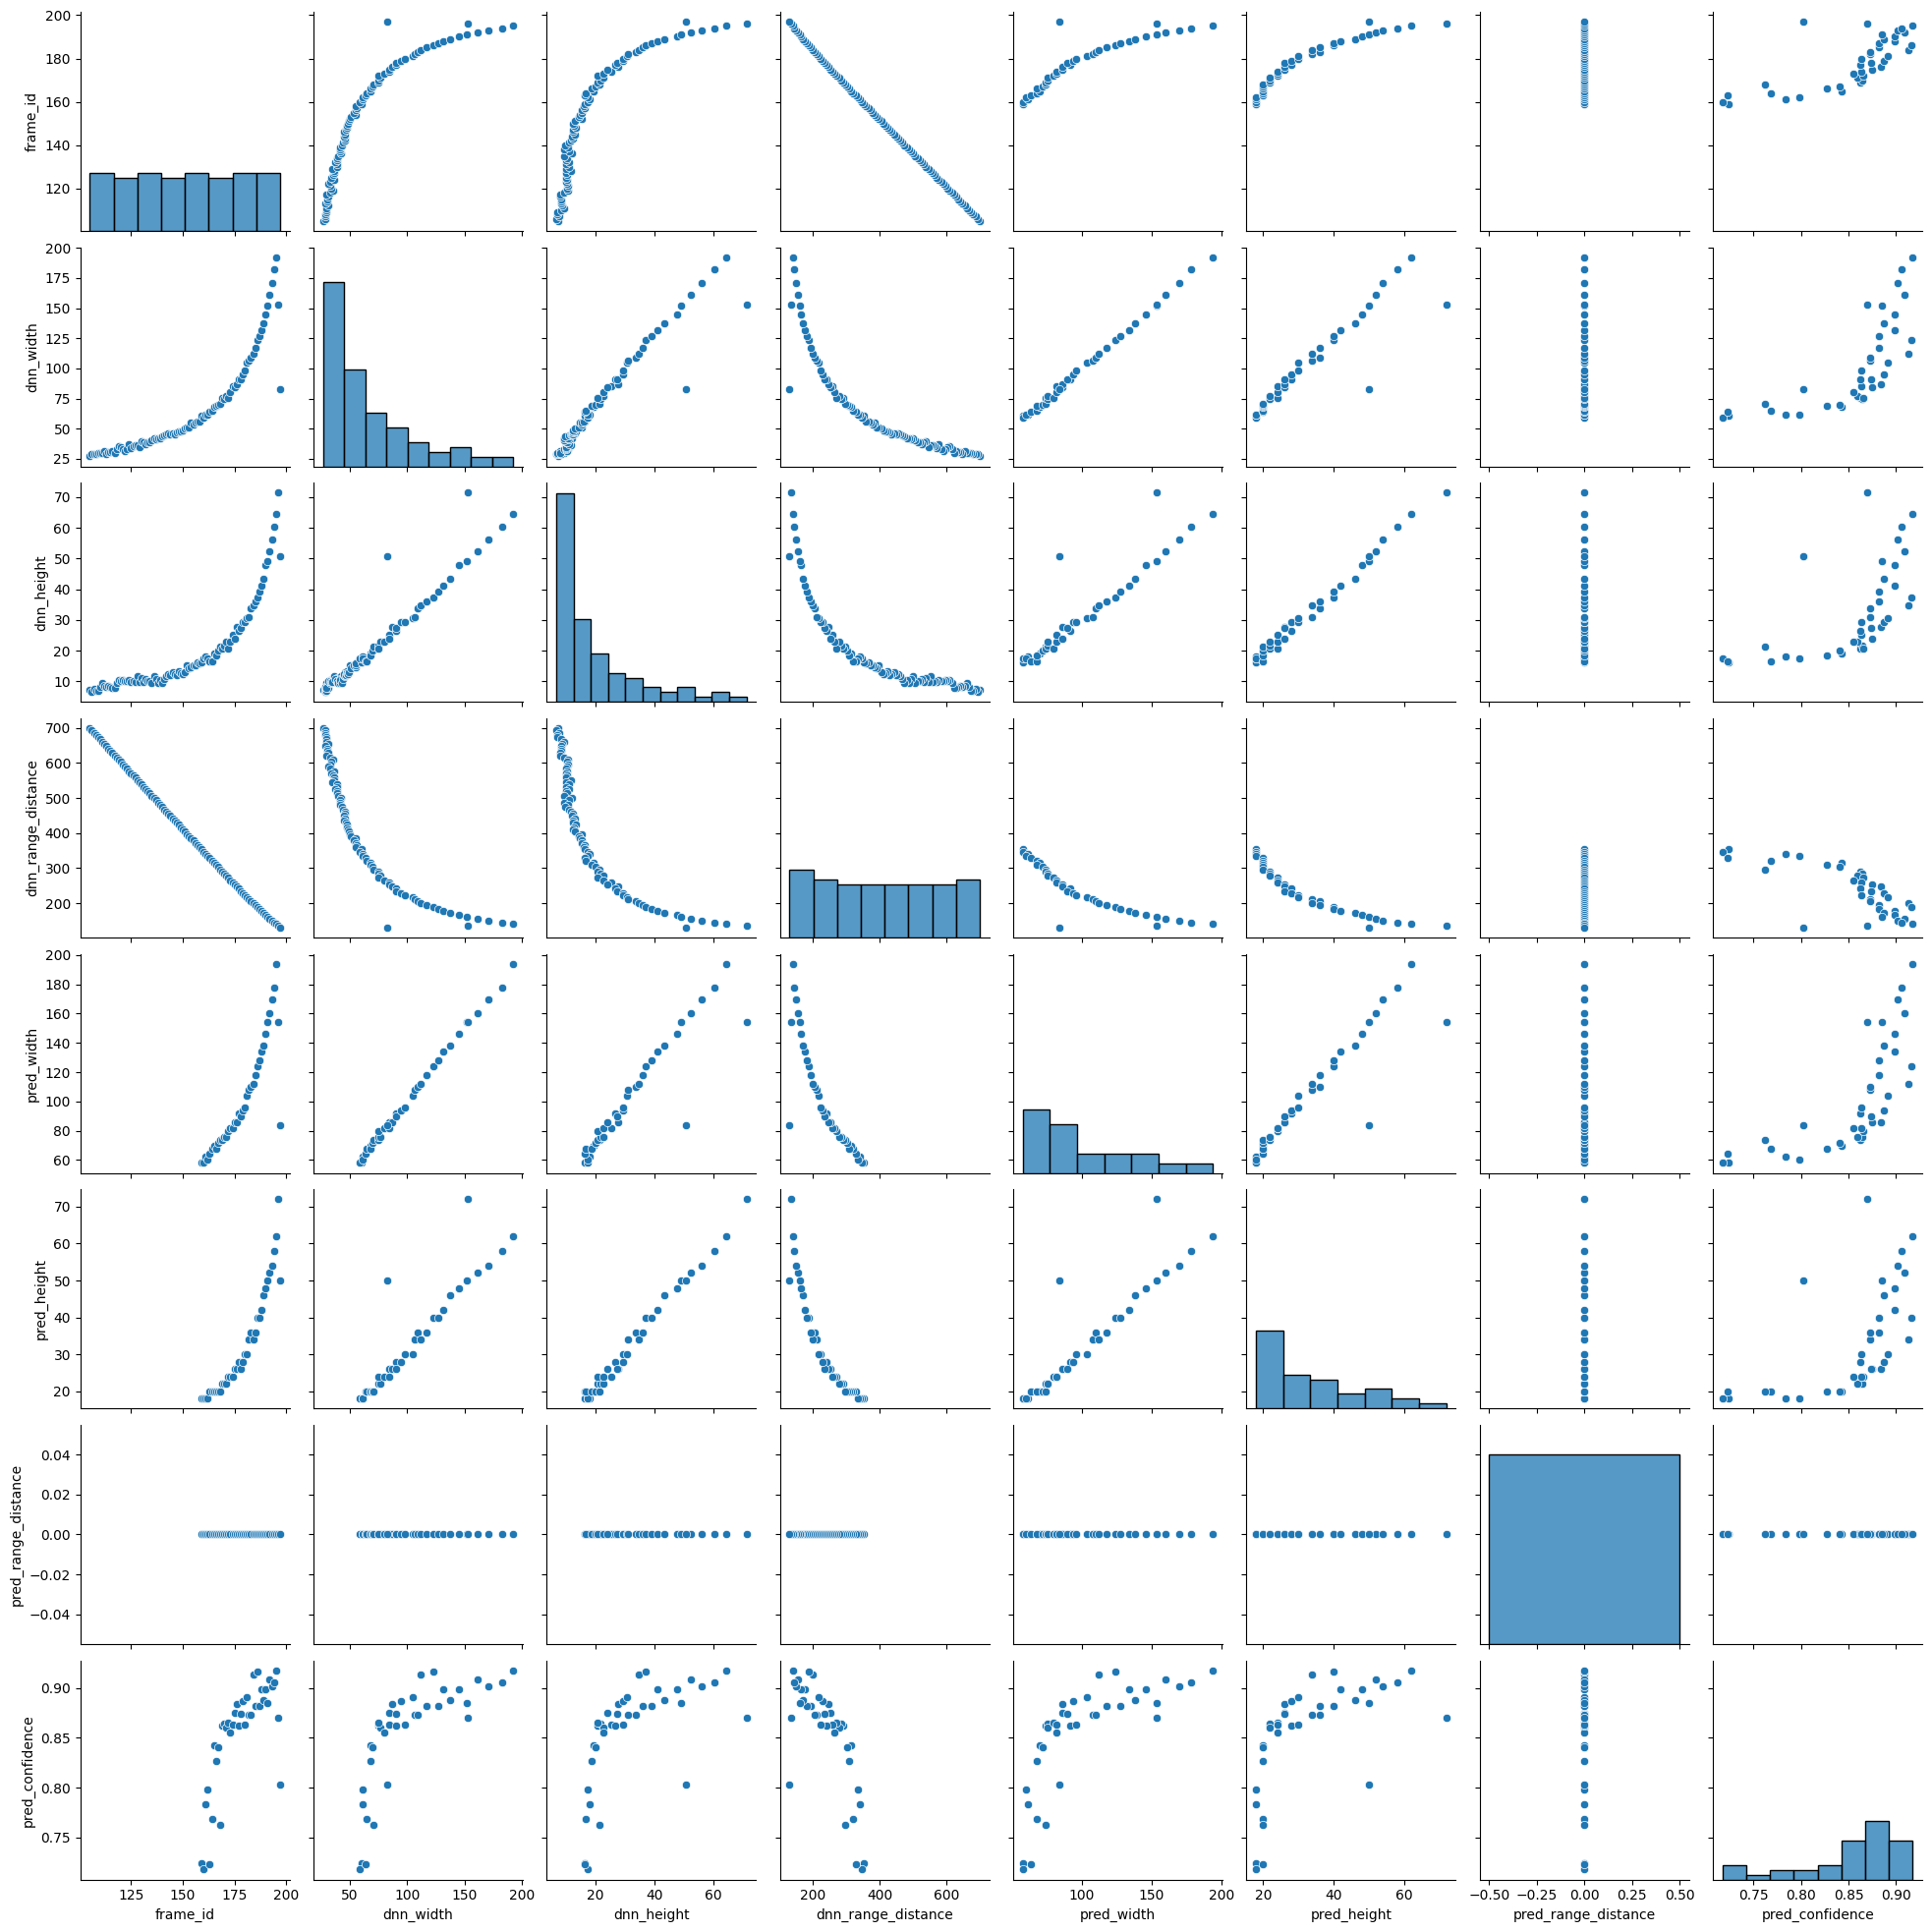

In [66]:
sns.pairplot(dnn_result_dataframe)
plt.show()

## DNN flight

In [10]:
#print(check_output(["ls", "../input"]).decode("utf8"))
path_flight_dnn = dnn_dataset+flight_id+".csv"

flight_dnn = pd.read_csv(path_flight_dnn)
#data.info()
flight_dnn.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,105,1414.4,1180.0,27.0,7.2,194.40,E:/Datasets/AmazonAirPrime/airborne-detection-...,699.080159
1,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,106,1416.6,1174.8,28.6,6.6,188.76,E:/Datasets/AmazonAirPrime/airborne-detection-...,692.630062
2,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,107,1417.4,1171.4,29.2,7.6,221.92,E:/Datasets/AmazonAirPrime/airborne-detection-...,686.419015
3,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,108,1418.8,1172.4,28.8,7.0,201.60,E:/Datasets/AmazonAirPrime/airborne-detection-...,679.760444
4,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,109,1422.0,1167.4,29.4,6.8,199.92,E:/Datasets/AmazonAirPrime/airborne-detection-...,673.387413


In [11]:
flight_dnn.tail()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
88,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,193,2113.4,1363.2,170.6,56.2,9587.72,E:/Datasets/AmazonAirPrime/airborne-detection-...,150.086884
89,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,194,2165.0,1374.4,182.2,60.4,11004.88,E:/Datasets/AmazonAirPrime/airborne-detection-...,145.123922
90,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,195,2227.6,1384.8,192.2,64.6,12416.12,E:/Datasets/AmazonAirPrime/airborne-detection-...,140.130316
91,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,196,2292.6,1401.8,152.6,71.4,10895.64,E:/Datasets/AmazonAirPrime/airborne-detection-...,135.441598
92,00bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,197,2363.2,1418.4,82.6,50.8,4196.08,E:/Datasets/AmazonAirPrime/airborne-detection-...,130.914401


In [4]:
flight_dnn.describe()

,frame_id,left,top,width,height,area,range_distance
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,151.000000,1606.708350,1199.060713,65.634371,19.779036,1842.236145,406.793880
std,26.990739,219.034697,71.076180,39.447942,14.419344,2603.848644,169.403831
min,105.000000,1414.400000,1137.600000,27.000000,6.600000,188.760000,130.914401
25%,128.000000,1458.000000,1147.800000,36.600000,10.200000,377.360000,259.552576
50%,151.000000,1508.400000,1166.000000,49.800000,13.200000,647.400000,404.134268
75%,174.000000,1691.800000,1224.000000,82.600000,24.000000,2016.000000,551.537168
max,197.000000,2363.200000,1418.400000,192.200000,71.400000,12416.120000,699.080159


In [65]:
flight_dnn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       93 non-null     object 
 1   object_type     93 non-null     object 
 2   object          93 non-null     object 
 3   frame_id        93 non-null     int64  
 4   left            93 non-null     float64
 5   top             93 non-null     float64
 6   width           93 non-null     float64
 7   height          93 non-null     float64
 8   area            93 non-null     float64
 9   image_path      93 non-null     object 
 10  range_distance  93 non-null     float64
dtypes: float64(6), int64(1), object(4)
memory usage: 8.1+ KB


## Pred Dataframe

In [12]:
#print(check_output(["ls", "../input"]).decode("utf8"))
path_dnn_pred_dataframe = os.path.join(output_path_folder+flight_id+"/")+'/dnn_pred_dataframe.csv'
dnn_pred_dataframe = pd.read_csv(path_dnn_pred_dataframe)
#data.info()
dnn_pred_dataframe.head()

,object_type,frame_id,left,top,width,height,area,range_distance,confidence
0,Airplane,159,1550.0,1172.0,58.0,18.0,1044.0,0,0.724027
1,Airplane,160,1556.0,1178.0,58.0,18.0,1044.0,0,0.717685
2,Airplane,161,1560.0,1178.0,62.0,18.0,1116.0,0,0.783671
3,Airplane,162,1570.0,1180.0,60.0,18.0,1080.0,0,0.797964
4,Airplane,163,1574.0,1188.0,64.0,20.0,1280.0,0,0.723258


In [67]:
dnn_pred_dataframe.describe()

,frame_id,left,top,width,height,area,range_distance,confidence
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.000000
mean,177.500000,1794.150000,1259.650000,100.650000,32.800000,3774.600000,0.0,0.854181
std,11.690452,219.898059,70.959559,36.890378,14.896566,3050.556644,0.0,0.059945
min,158.000000,1542.000000,1172.000000,56.000000,16.000000,896.000000,0.0,0.647267
25%,167.750000,1614.000000,1202.500000,76.000000,21.500000,1634.000000,0.0,0.843734
50%,177.500000,1743.000000,1240.000000,87.000000,27.000000,2376.000000,0.0,0.870259
75%,187.250000,1904.500000,1311.000000,124.500000,40.500000,5124.000000,0.0,0.897768
max,197.000000,2364.000000,1420.000000,192.000000,70.000000,12288.000000,0.0,0.925437


In [68]:
dnn_pred_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   object_type     40 non-null     object 
 1   frame_id        40 non-null     int64  
 2   left            40 non-null     float64
 3   top             40 non-null     float64
 4   width           40 non-null     float64
 5   height          40 non-null     float64
 6   area            40 non-null     float64
 7   range_distance  40 non-null     int64  
 8   confidence      40 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 2.9+ KB


In [69]:
dnn_pred_dataframe[dnn_pred_dataframe["frame_id"]==158]

,object_type,frame_id,left,top,width,height,area,range_distance,confidence
0,Airplane,158,1542.0,1172.0,56.0,16.0,896.0,0,0.752347


# Tum Dataseti Analiz 

In [9]:
import glob


dataset = pd.DataFrame()
for csv_file in glob.iglob(os.path.join(dnn_dataset, '*.csv')):
    dataframe_csv_file =pd.read_csv(csv_file)
    dataset = pd.concat([dataset,dataframe_csv_file],axis =0,ignore_index =True)


dataset.head()  

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,229,1551.358765,1121.692017,16.0,16.0,256.0,E:/Datasets/AmazonAirPrime/airborne-detection-...,698.099154
1,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,230,1559.000000,1123.400000,16.0,16.0,256.0,E:/Datasets/AmazonAirPrime/airborne-detection-...,692.553591
2,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,231,1561.330688,1119.515991,16.0,16.0,256.0,E:/Datasets/AmazonAirPrime/airborne-detection-...,687.144329
3,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,232,1564.058960,1123.598999,16.0,16.0,256.0,E:/Datasets/AmazonAirPrime/airborne-detection-...,681.758264
4,0001ba865c8e410e88609541b8f55ffc,Helicopter,Helicopter1,233,1563.531860,1124.573975,16.0,16.0,256.0,E:/Datasets/AmazonAirPrime/airborne-detection-...,676.482461


In [11]:
dataset.tail()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
9069,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1189,772.307692,233.076923,146.923077,176.153846,25881.065089,E:/Datasets/AmazonAirPrime/airborne-detection-...,50.643230
9070,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1190,716.923077,136.923077,170.000000,194.615385,33084.615385,E:/Datasets/AmazonAirPrime/airborne-detection-...,46.777990
9071,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1191,654.615385,21.538462,188.461538,230.000000,43346.153846,E:/Datasets/AmazonAirPrime/airborne-detection-...,43.162551
9072,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1192,593.076923,4.615385,203.846154,147.692308,30106.508876,E:/Datasets/AmazonAirPrime/airborne-detection-...,39.686723
9073,0549559b37d741389e3dec0fcd62b161,Helicopter,Helicopter1,1193,702.307692,3.846154,26.153846,23.076923,603.550296,E:/Datasets/AmazonAirPrime/airborne-detection-...,36.513925


In [14]:
dataset.shape

(9074, 11)

In [12]:
# 'A' sütunundaki en büyük değere sahip elemana erişmek
max_value = dataset['range_distance'].max()

# 'A' sütunundaki en büyük değere sahip elemanın konumunu elde etmek
max_index = dataset['range_distance'].idxmax()

# sonucu yazdırmak
print('En büyük değer:', max_value)
print('En büyük değere sahip elemanın konumu:', max_index)

En büyük değer: 699.7864531996557
En büyük değere sahip elemanın konumu: 2432


In [16]:
max_row = dataset.loc[max_index]
max_row

flight_id                          01f9c2223f374f0c8a818933f4f7efca
object_type                                                Airplane
object                                                    Airplane1
frame_id                                                        847
left                                                         1454.8
top                                                          1016.6
width                                                          19.4
height                                                          6.4
area                                                         124.16
image_path        E:/Datasets/AmazonAirPrime/airborne-detection-...
range_distance                                           699.786453
Name: 2432, dtype: object

C:\Users\Aircar\AppData\Local\Temp\ipykernel_18188\4062422595.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in dataset.iteritems():


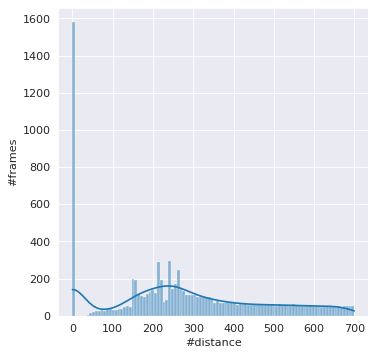

None

Avg:  280.34895392227907
Min:  0.0
Max:  699.7864531996557


In [26]:
obj_distance = []

for col_name, col_data in dataset.iteritems():
    if col_name == 'range_distance':
        for element in col_data:
                obj_distance.append(element)
               

obj_distance = pd.Series(obj_distance).fillna(0).astype(float)

plt.figure(figsize=(5, 5), dpi=80)
with sns.axes_style("darkgrid"):
  sns.histplot(obj_distance, kde=True, bins=100)
plt.ylabel('#frames')
plt.xlabel('#distance')
display(plt.show())

print("Avg: ", sum(obj_distance) / len(obj_distance))
print("Min: ", min(obj_distance))
print("Max: ", max(obj_distance))

C:\Users\Aircar\AppData\Local\Temp\ipykernel_18188\3481847288.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, col_data in dataset.iteritems():


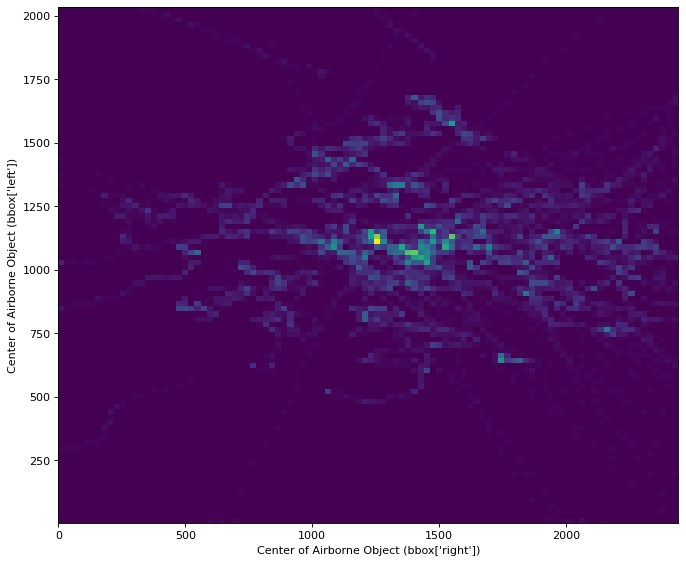

In [27]:
obj_center_left = []
obj_center_top = []


for col_name, col_data in dataset.iteritems():
    if col_name == 'left':
        for element in col_data:
                obj_center_left.append(element)

    elif col_name == 'top':
        for element in col_data:
                obj_center_top.append(element)


heatmap, xedges, yedges = np.histogram2d(obj_center_left, obj_center_top, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.ylabel("Center of Airborne Object (bbox['left'])")
plt.xlabel("Center of Airborne Object (bbox['right'])")
plt.show()